<a href="https://colab.research.google.com/github/marcelogbrito/machine-learning-negocios/blob/main/DeteccaoFraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import special

import itertools
from datetime import timedelta
from IPython.display import display

In [2]:
fraudes = pd.read_csv('https://github.com/marcelogbrito/machine-learning-negocios/blob/main/Fraud_Data.csv?raw=true', header=0)

In [3]:
ips = pd.read_csv("https://github.com/marcelogbrito/machine-learning-negocios/blob/main/IpAddress_to_Country.csv?raw=true",header=0)

In [4]:
fraudes.dtypes

id                  int64
cadastro           object
compra             object
valor               int64
id_dispositivo     object
fonte              object
browser            object
genero             object
idade               int64
ip                float64
fraude              int64
dtype: object

In [5]:
for col in fraudes.columns:
    print("# de valores nulos em {}: {}".format(col, fraudes[col].isnull().sum()))

# de valores nulos em id: 0
# de valores nulos em cadastro: 0
# de valores nulos em compra: 0
# de valores nulos em valor: 0
# de valores nulos em id_dispositivo: 0
# de valores nulos em fonte: 0
# de valores nulos em browser: 0
# de valores nulos em genero: 0
# de valores nulos em idade: 0
# de valores nulos em ip: 0
# de valores nulos em fraude: 0


In [6]:
fraudes.describe()

,id,valor,idade,ip,fraude
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [7]:
for col in ips.columns:
    print("{}: {}".format(col, ips[col].dtype))

limite_inferior_ip: float64
limite_superior_ip: int64
pais: object


In [8]:
# checar se os numeros de ip sao inteiros ou nao com lambdas
ip_floats = ips.limite_inferior_ip.apply(lambda x: not x.is_integer()).sum()
print("Número de limites inferiores de endereço IP com decimal não-zero: {}".format(ip_floats))

Número de limites inferiores de endereço IP com decimal não-zero: 0


In [9]:
ips.limite_inferior_ip = ips.limite_inferior_ip.astype(int)

In [10]:
for col in ips.columns:
    print("# de valores nulos em {}: {}".format(col, ips[col].isnull().sum()))

# de valores nulos em limite_inferior_ip: 0
# de valores nulos em limite_superior_ip: 0
# de valores nulos em pais: 0


In [11]:
#checar se há outliers
display(ips[ips.limite_inferior_ip == ips.limite_inferior_ip.max()])
display(ips[ips.limite_superior_ip == ips.limite_superior_ip.max()])

,limite_inferior_ip,limite_superior_ip,pais
138845,3758096128,3758096383,Australia


,limite_inferior_ip,limite_superior_ip,pais
138845,3758096128,3758096383,Australia


In [12]:
ips.describe()

,limite_inferior_ip,limite_superior_ip
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [13]:
fraudes.describe()

,id,valor,idade,ip,fraude
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [14]:
def isp_counts(isp):
    pais = ips[(ips.limite_inferior_ip <= isp) & (ips.limite_superior_ip >= isp)]
    if pais.shape[0] == 1:
        return print("Único")
    elif pais.shape[0] > 1:
        return print("Vários países")
    elif pais.shape[0] == 0:
        if isp > ips.limite_superior_ip.max():
            return print("Muito grande")
        elif isp < ips.limite_inferior_ip.min():
            return print("Muito pequeno")
        else:
            return print("Faltando")
        
ip_counts = fraudes.ip.apply(isp_counts)
ip_counts.value_counts()

A saída de streaming foi truncada nas últimas 5000 linhas.
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Ún

Series([], Name: ip, dtype: int64)

In [15]:
def ip_para_pais(ip):
    tmp = ips[(ips.limite_inferior_ip <= ip) & (ips.limite_superior_ip >= ip)].pais
    if tmp.shape[0] == 1:
        return tmp.iloc[0]
    elif tmp.shape[0] < 1:
        return print("Faltando")
    elif tmp.shape[0] > 1:
        return print("Erro")

fraudes["pais"] = fraudes.ip.apply(ip_para_pais)

A saída de streaming foi truncada nas últimas 5000 linhas.
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Falta

In [16]:
fraudes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


## Analise exploratoria

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Genero x fraude

Text(0, 0.5, 'Casos')

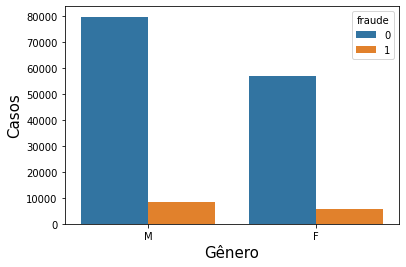

In [18]:
sns.countplot(x="genero", hue="fraude", data=fraudes)
plt.xlabel("Gênero", fontsize=15)
plt.ylabel("Casos", fontsize=15)

usando histograma countplot do seaborn usado apara contagem de observações em cada categoria (dados categoricos) https://seaborn.pydata.org/generated/seaborn.countplot.html

Hue indica de acordo com a variavel o que é fraude e o que não é

homens compõe a maioria da base de clientes do E-commerce. Portanto, estes estarão envolvidos em mais casos de fraude do que em relação às mulheres que compõe a minoria dos clientes.

### Fraude x valor

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.42499999999999716, 0.5, 'Valor de compra')

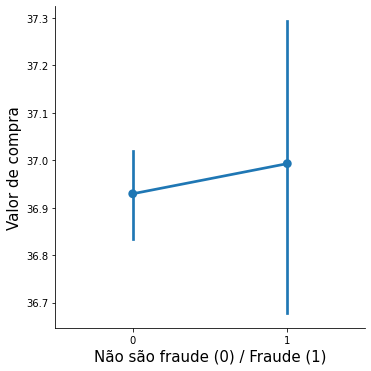

In [19]:
sns.factorplot(x="fraude", y="valor", data=fraudes)
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Valor de compra", fontsize=15)

gráfico factorplot do seaborn permite fazer uma analise estatistica em conjunto

Text(3.674999999999997, 0.5, 'Valor de compra')

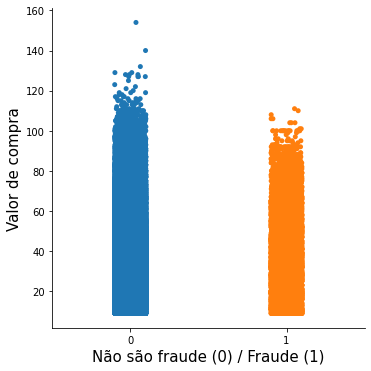

In [20]:
sns.catplot(x="fraude", y="valor", data=fraudes)
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Valor de compra", fontsize=15)

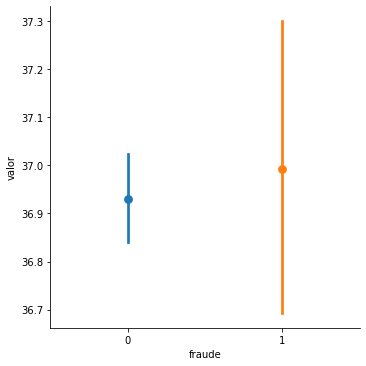

In [21]:
sns.catplot(x="fraude", y="valor", hue="fraude", kind="point", data=fraudes)

Observando a visualização, perceberemos que conseguimos produzir um gráfico que nos mostrará a média de valor de compra em cada um dos casos de fraude e não fraude. Embora haja um aumento muito pequeno no valor médio de compra associado à atividade fraudulenta apontados pelos pontos, as barras de erro são razoavelmente grandes para detectar uma tendência real. Aparentemente, ainda não temos informações consistentes.



### Fraude x idade

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-5.825000000000003, 0.5, 'Idade')

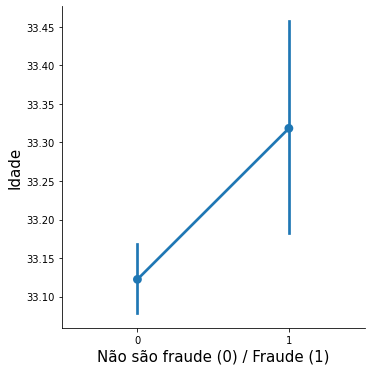

In [22]:
sns.factorplot(x="fraude", y="idade", data=fraudes)
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Idade", fontsize=15)

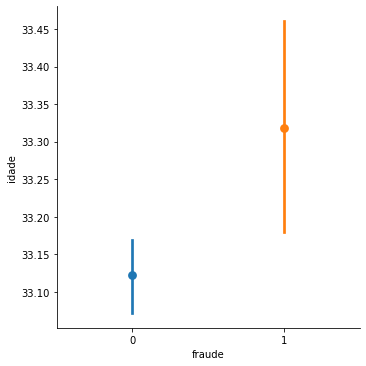

In [23]:
sns.catplot(x="fraude", y="idade", hue="fraude", kind="point", data=fraudes)

No gráfico fornecido, parece que pode haver uma tendência útil, mas novamente o aumento é bastante sutil; apesar de os casos de fraude terem uma média de idade um pouco maior dos que os casos de não fraude, a informação estará dentro das barras de erro inclusive. Portanto, não poderemos tirar nenhuma conclusão efetiva.

### Fraude x fonte de marketing

Text(0, 0.5, 'Contagem')

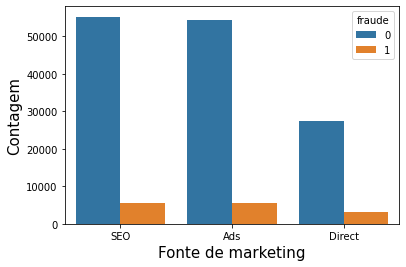

In [24]:
sns.countplot(x="fonte", hue="fraude", data=fraudes)
plt.xlabel("Fonte de marketing", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

Perceberemos que, de forma geral, não parece existir uma fonte específica mais associada às fraudes. Porém, há menos fontes diretas associadas a fraude, pois são a minoria no geral.

Portanto, a diminuição provavelmente tem a ver com a campanha não ser tão bem sucedida quanto a otimização dos mecanismos de pesquisa e anúncio para atrair clientes ao site, o que fornece o dado à equipe de marketing da empresa de que realmente os usuários tendem a chegar na companhia mais por conta dos algoritmos do que anúncios, o que pode gerar mais campanhas fora da internet para aumentar a parte de "Direct".

## Explorando os países

In [25]:
#soma casos de fraude e gera um dataframe
sums_f = fraudes[fraudes["fraude"] == 1]["fraude"].groupby(fraudes.pais).sum()
sums_f = sums_f.to_frame().reset_index()

# soma casos de nao fraude e gera um dataframe
sums_nf = fraudes[fraudes["fraude"] == 0]["fraude"].groupby(fraudes.pais).sum()
sums_nf = sums_nf.to_frame().reset_index()

Text(0, 0.5, 'Países')

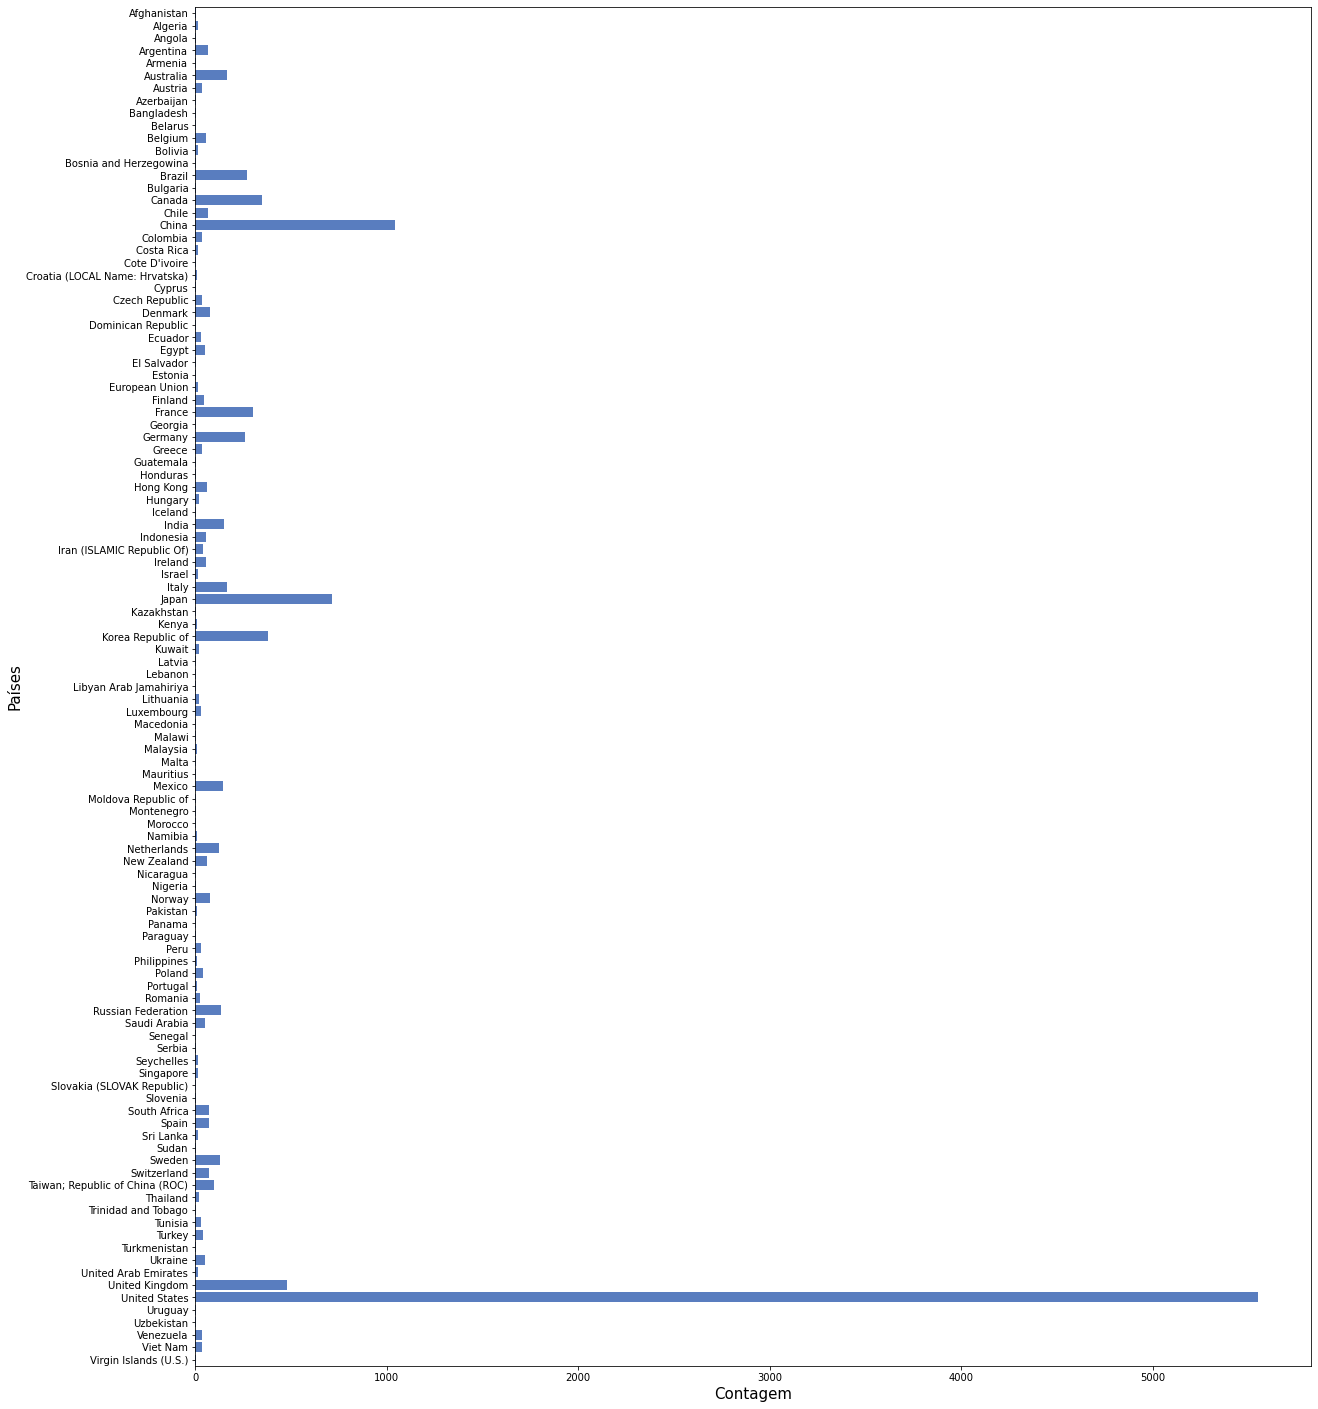

In [26]:
#duas novas variáveis f e ax para podermos usar uma função dentro do gráfico sem precisarmos escrever tudo novamente, 
#caso quisermos. Serão iguais a subplots() que receberão a definição do tamanho da imagem como tendo quase as mesmas 
#dimensões da célula, ou seja, figsize igual a (20,25)
f, ax = plt.subplots(figsize=(20,25))
#cores através de sns.set_color_code() recebendo "muted" https://seaborn.pydata.org/tutorial/color_palettes.html
sns.set_color_codes("muted")
sns.barplot(x="fraude", y="pais", data=sums_f,
            label="Total", color="b")
plt.xlabel("Contagem",fontsize=15)
plt.ylabel("Países",fontsize=15)

Aparentemente, alguns lugares como Estados Unidos e Reino Unido possuem mais casos fraudulentos, mas não poderemos identificar esse fato como uma possível variável-foco, pois não sabemos efetivamente qual é o percentual de ocorrências.

## Explorando os IDs e IPs

In [31]:
tmp_df = pd.DataFrame(columns=("fraude","id_por_dispositivo","id_por_ip"))
tmp_df["fraude"] = fraudes["fraude"]

userid_count = fraudes.groupby(["id_dispositivo"]).id.count()
tmp_df["id_por_dispositivo"] = fraudes.id_dispositivo.apply(lambda x: userid_count[x])

userid_count2 = fraudes.groupby(["ip"]).id.count()
tmp_df["id_por_ip"] = fraudes.ip.apply(lambda x: userid_count2[x])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


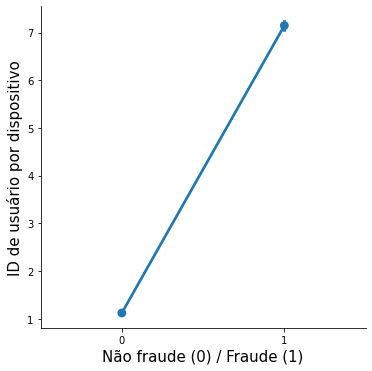

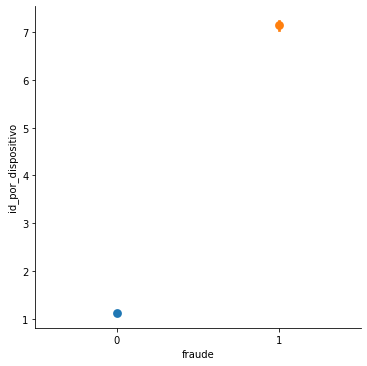

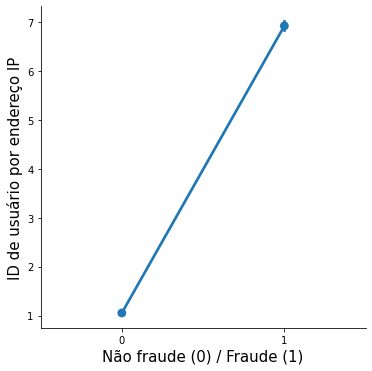

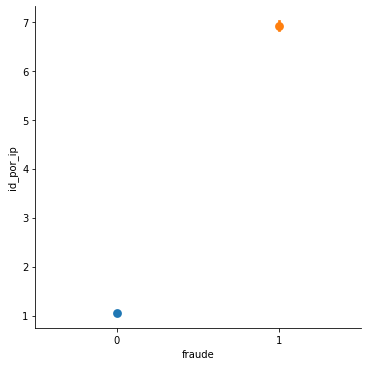

In [33]:
sns.factorplot(x="fraude", y="id_por_dispositivo", data=tmp_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("ID de usuário por dispositivo", fontsize=15)

sns.catplot(x="fraude", y="id_por_dispositivo", hue="fraude", kind="point", data=tmp_df)

sns.factorplot(x="fraude", y="id_por_ip", data=tmp_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("ID de usuário por endereço IP", fontsize=15)
sns.catplot(x="fraude", y="id_por_ip", hue="fraude", kind="point", data=tmp_df)


Como retorno da execução do código, receberemos dois gráficos e perceberemos correlações bastante claras e importantes entre ambos; vários IDs de usuários associados a um ID de dispositivo único ou a um endereço IP nos fornecem um grande indicador de comportamentos fraudulentos.

Essa observação faz sentido, pois se tivermos uma só pessoa realizando compras no E-commerce, teremos apenas um ID e um dispositivo, ou um ID e um endereço de IP, ou seja, caso haja um ID de usuário associado a vários dispositivos ou endereços de IP, é possível entender que há diversas pessoas ou robôs manipulando a conta.

Analisando os gráficos, veremos uma média de 7 IDs por dispositivo ou endereço de IP. Pode ser que haja um mesmo computador com um IP próprio conectado em uma mesma rede que está utilizando várias contas, o que indica fraudes também.

## Explorando o periodo de compra

In [34]:
#usando datetime para descobrir tempo decorrido entre o cadastro e a compra
tmp_df["cadastro"] = fraudes.cadastro.apply(pd.to_datetime)
tmp_df["compra"] = fraudes.compra.apply(pd.to_datetime)

tmp_df["tempo"] = (tmp_df.compra - tmp_df.cadastro).apply(lambda x: x.seconds)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-8.825000000000003, 0.5, 'Tempo entre início e compra (segundos)')

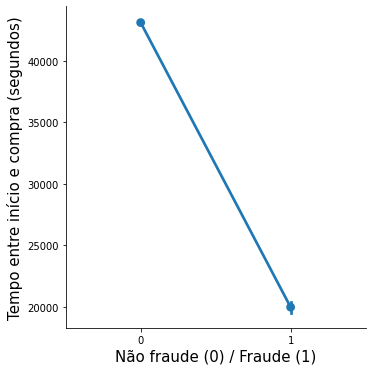

In [35]:
sns.factorplot(x="fraude", y="tempo", data=tmp_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Tempo entre início e compra (segundos)", fontsize=15)

quando se trata de uma não fraude, o tempo entre o cadastro e a compra é maior, pois é necessário entrar em um website e preencher com os dados pessoais e de pagamento na página, o que acarreta certa demora.

Nos casos de fraude, o tempo corresponde a menos da metade do tempo necessário para as situações regulares. Então, também são correlações claramente importantes, pois prova que essa diferença está fortemente relacionada com atividades fraudulentas também.

Portanto, teremos muitas informações para fazermos outras análises que abarcam o dia da semana, hora do dia, semana do ano e etc.

In [36]:
#uma olhadinha no banco de dados
tmp_df.head()

,fraude,id_por_dispositivo,id_por_ip,cadastro,compra,tempo
0,0,1,1,2015-02-24 22:55:49,2015-04-18 02:47:11,13882
1,0,1,1,2015-06-07 20:39:50,2015-06-08 01:38:54,17944
2,1,12,12,2015-01-01 18:52:44,2015-01-01 18:52:45,1
3,0,1,1,2015-04-28 21:13:25,2015-05-04 13:54:50,60085
4,0,1,1,2015-07-21 07:09:52,2015-09-09 18:40:53,41461


Observando os números, veremos o caso de 12 IDs que realizou o cadastro e a compra em apenas 1 segundo, o que é humanamente impossível e confirma a fraude.

Text(0, 0.5, 'Contagem')

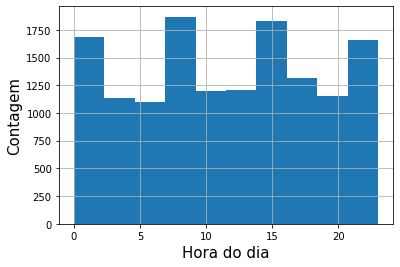

In [37]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.hour).hist()
plt.xlabel("Hora do dia", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

horas do dia em que as situações de fraude mais significativas começam a acontecer. Aparentemente, há uma correlação que não faz muito sentido em relação aos momentos do dia.

Text(0, 0.5, 'Contagem')

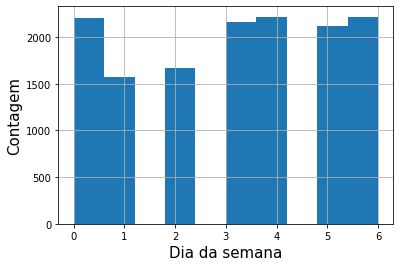

In [38]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.dayofweek).hist()
plt.xlabel("Dia da semana", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

parece que a fraude acontece com bastante regularidade tanto ao longo das horas do dia quanto dos dias da semana.

Text(0, 0.5, 'Contagem')

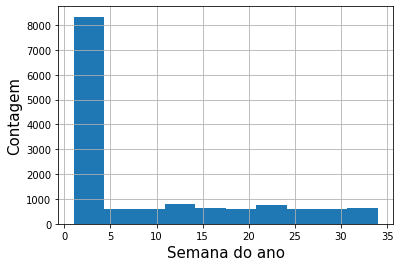

In [39]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.week).hist()
plt.xlabel("Semana do ano", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

há um enorme número de ocorrências de fraude nas primeiras semanas do ano que correspondem aos períodos de Natal e Ano Novo. Porém, não teremos certeza de que isso será um recurso útil em nosso conjunto de dados, afinal é uma época quando muitos clientes regulares costumam fazer compras no E-commerce.

Portanto, é mais apropriado simplesmente recomendar que a equipe de segurança da empresa esteja sempre em alerta máximo durante as primeiras três semanas do ano.

# Engenharia de Features

In [40]:
# cria nova coluna id_por_dispoitivo
userid_count3 = fraudes.groupby("id_dispositivo").id.count()
fraudes["id_por_dispositivo"] = fraudes.id_dispositivo.apply(lambda x: userid_count3[x])

fraudes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1


In [41]:
userid_count4 = fraudes.groupby("ip").id.count()
fraudes["id_por_ip"] = fraudes.ip.apply(lambda x: userid_count4[x])

fraudes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1


In [42]:
# media id_por)dispositivo id_por_ip
fraudes["media_id"] = (fraudes.id_por_dispositivo + fraudes.id_por_ip) * 0.5

fraudes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,media_id
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None,1,1,1.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0


In [43]:
fraudes.cadastro = fraudes.cadastro.apply(pd.to_datetime)
fraudes.compra = fraudes.compra.apply(pd.to_datetime)
fraudes["tempo"] = (fraudes.compra - fraudes.cadastro).apply(lambda x: x.seconds)

fraudes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,media_id,tempo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None,1,1,1.0,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0,41461


In [44]:
#transformando categorias em colunas numericas dummies 
pais_dummies = pd.get_dummies(fraudes.pais, prefix='pais')
fraudes = pd.concat([fraudes, pais_dummies], axis=1)

fraudes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositivo,id_por_ip,media_id,tempo,pais_Afghanistan,pais_Albania,pais_Algeria,pais_Angola,pais_Antigua and Barbuda,pais_Argentina,pais_Armenia,pais_Australia,pais_Austria,pais_Azerbaijan,pais_Bahamas,pais_Bahrain,pais_Bangladesh,pais_Barbados,pais_Belarus,pais_Belgium,pais_Belize,pais_Benin,pais_Bermuda,pais_Bhutan,pais_Bolivia,pais_Bonaire; Sint Eustatius; Saba,pais_Bosnia and Herzegowina,pais_Botswana,...,pais_Saint Kitts and Nevis,pais_Saint Martin,pais_San Marino,pais_Saudi Arabia,pais_Senegal,pais_Serbia,pais_Seychelles,pais_Singapore,pais_Slovakia (SLOVAK Republic),pais_Slovenia,pais_South Africa,pais_South Sudan,pais_Spain,pais_Sri Lanka,pais_Sudan,pais_Sweden,pais_Switzerland,pais_Syrian Arab Republic,pais_Taiwan; Republic of China (ROC),pais_Tajikistan,pais_Tanzania United Republic of,pais_Thailand,pais_Trinidad and Tobago,pais_Tunisia,pais_Turkey,pais_Turkmenistan,pais_Uganda,pais_Ukraine,pais_United Arab Emirates,pais_United Kingdom,pais_United States,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0,13882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0,17944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None,1,1,1.0,60085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0,41461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [47]:
# dando drop em algumas variaveis que pelas analises anteriores ja verificamos nao serem importantes
fraudes.drop(["id",
            "cadastro",
            "compra",
            "id_dispositivo",
            "ip",
            "id_por_dispositivo",
            "id_por_ip",
            "pais",
            "fonte",
            "browser",
            "genero",
            "idade",
            "valor"], axis=1, inplace = True)

## Transformando variaveis em gaussianas

Text(0, 0.5, 'Contagem normalizada')

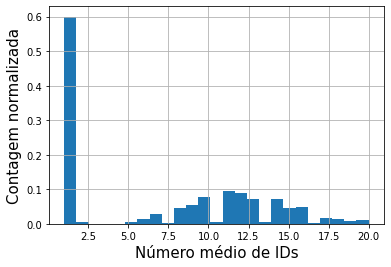

In [50]:
fraudes[fraudes["fraude"] == 1].media_id.hist(density=True, bins=25)
plt.xlabel("Número médio de IDs", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

há um grande pico entre 1.0 e 1.5, e em seguida teremos uma distribuição gaussiana, ou seja, uma distribuição normal centrada por volta de 12 com o desvio padrão de aproximadamente 3.

Devido à natureza bimodal, não há muito o que fazer para tornar o gráfico mais gaussiano ou normal, pois temos um pico inicial. Portanto, é como se tivéssemos uma curva com dois modos, mas um deles é bastante concentrada enquanto o outro é bem mais espalhado.

Text(0, 0.5, 'Contagem normalizada')

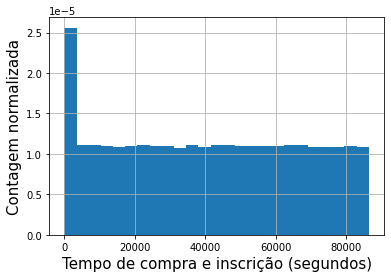

In [51]:
fraudes.tempo.hist(density=True, bins=25)
plt.xlabel("Tempo de compra e inscrição (segundos)", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

No retorno, teremos números distribuídos uniformemente, tirando o início que provavelmente está relacionado aos casos de fraude em que o tempo é de apenas 1 segundo. Mas queremos transformá-los em valores com distribuição gaussiana ou seja, de forma normal.

In [53]:
def rescale_series(ser):
    ser_min = ser.min() - 1e-5
    ser_max = ser.max() + 1e-5
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    new_ser = new_ser.apply(lambda x: np.sqrt(2)*special.erfinv(2*x - 1))
    return new_ser

Text(0, 0.5, 'Contagem normalizada')

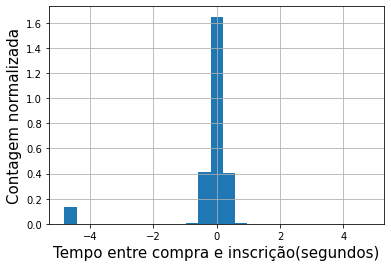

In [56]:
fraudes["tempo"] = rescale_series(fraudes.tempo)
fraudes.tempo.hist(density=True, bins=25)
plt.xlabel("Tempo entre compra e inscrição(segundos)", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

## Identificando variaveis importantes

In [58]:
def rescale_series(ser):
    ser_min = ser.min()
    ser_max = ser.max()
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    return new_ser

onehotencoded = [feature for feature in fraudes.columns if "pais" not in feature and feature != "fraude"]

for col in onehotencoded:
    fraudes[col] = rescale_series(fraudes[col])

    X = fraudes[ [col for col in fraudes.columns if col != "fraude"]]
    Y = fraudes["fraude"]

In [1]:
#salvando bancos para usar outra hora
X.to_csv("X.csv", index=False)
Y.to_csv("Y.csv", index=False)

NameError: ignored